# Data Exploration 03
You're working on an exhibit for a local museum called "The Titanic Disaster". They've asked you to analyze the passenger manifests and see if you can find any interesting information for the exhibit.

The museum curator is particularly interested in why some people might have been more likely to survive than others.

In [1]:
import pandas as pd 
import altair as alt 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
url='https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv'
titanic= pd.read_csv(url)

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


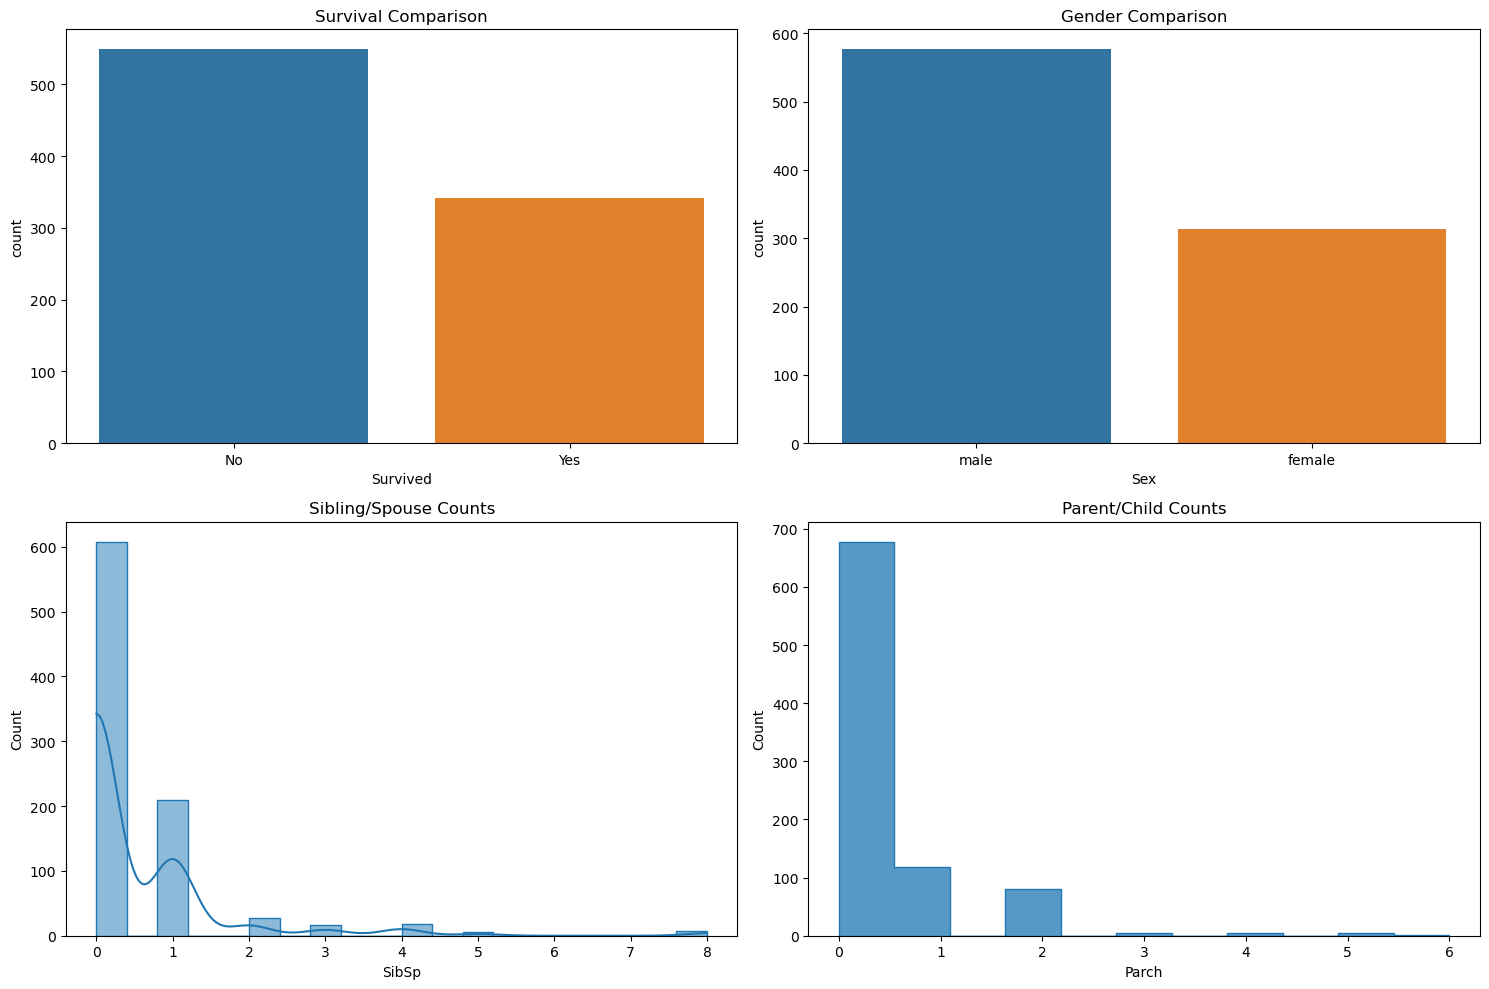

In [9]:

data = titanic.copy()
# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Use the countplot function to create a bar chart of survivors vs. non-survivors
sns.countplot(data=data, x='Survived', ax=ax[0][0])
ax[0][0].set_title("Survival Comparison")

# Use the countplot function to create a bar chart of males vs. females
sns.countplot(data=data, x='Sex', ax=ax[0][1])
ax[0][1].set_title("Gender Comparison")

# Use the histplot function to create a histogram of sibling/spouse counts
sns.histplot(data=data, x='SibSp', element='step',bins=20, kde=True, ax=ax[1][0])
ax[1][0].set_title("Sibling/Spouse Counts")

# Use the histplot function to create a histogram of parent/child counts
sns.histplot(data=data, x='Parch', element='step', ax=ax[1][1])
ax[1][1].set_title("Parent/Child Counts")

# adjust the layout
fig.tight_layout()

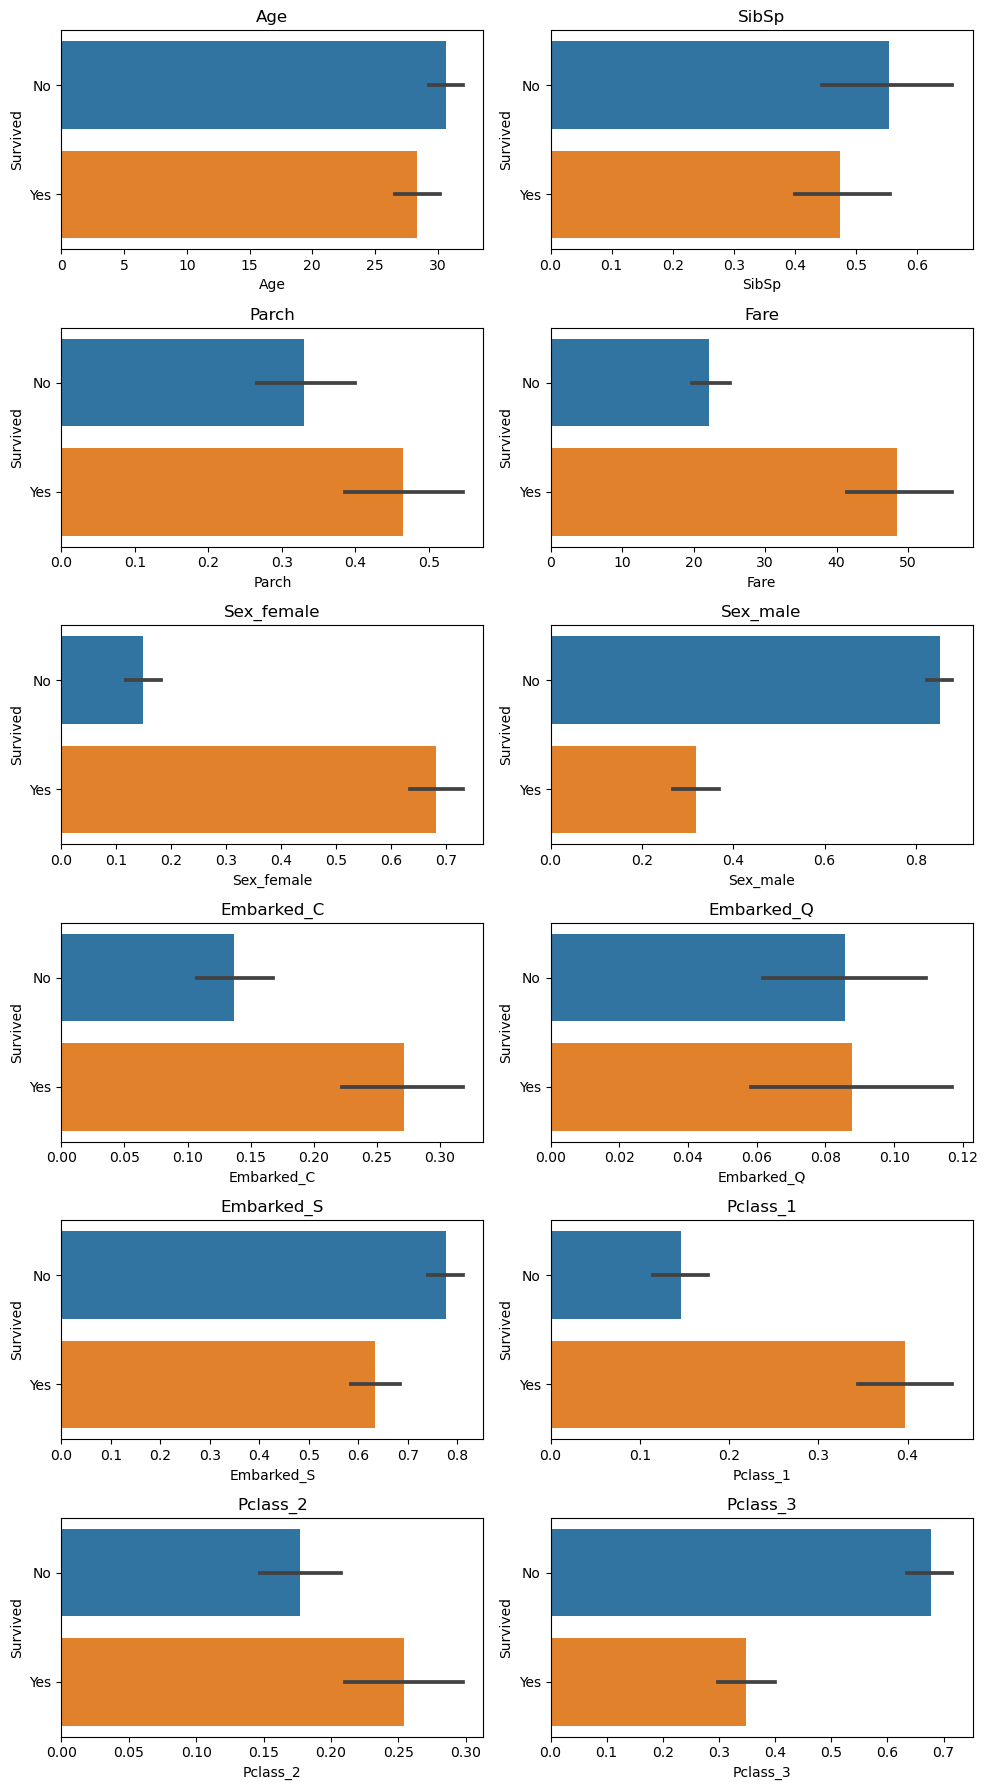

In [10]:
data = pd.get_dummies(titanic, columns = ["Sex", "Embarked", "Pclass"])
features = ["Age", "SibSp", "Parch", "Fare","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3"]
ncols = 2
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*3))

for i, feature in enumerate(features):
    row = i // ncols
    col = i % ncols
    ax[row][col].set_title(feature)
    sns.barplot(x=feature, y="Survived", data=data, ax=ax[row][col])

plt.tight_layout()

In [11]:
titanic['Title'] = titanic['Name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Rank
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,False
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False


In [13]:
titanic['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [15]:
titanic['Rank'] = titanic['Title'].isin(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Lady', 'Sir', 'Don', 'the Countess', 'Jonkheer'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Rank
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,False
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False


Text(39.227725694444445, 0.5, 'Number of Passengers')

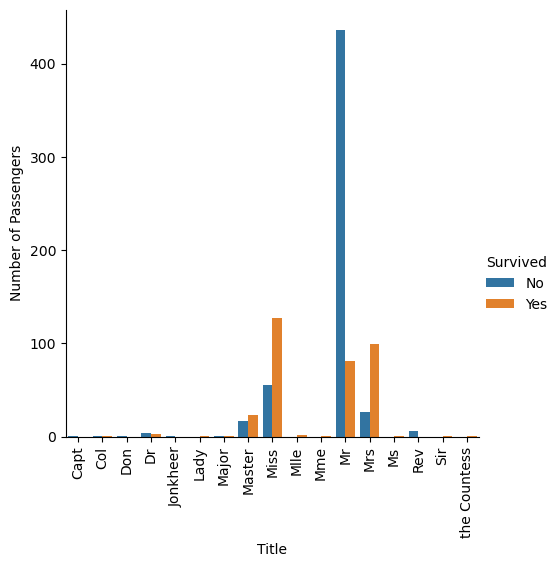

In [29]:
# group by title and survival status
data = titanic.groupby(["Title", "Survived"])["PassengerId"].count().reset_index()

# plot the chart
sns.catplot(x="Title", y="PassengerId", hue="Survived", kind="bar", data=data)
plt.xticks(rotation=90)
plt.ylabel("Number of Passengers")








In [32]:
# Doctors, Captains, and Reverands didn't fare too well
alt.Chart(titanic[titanic['Rank'] == True]).mark_bar().encode(
    x='Survived:N',
    y='count()',
    color='Survived:N',
    column='Title'
)

alt.Chart(...)

## Part 5: Encoding

The museum has partnered with a data science group to build some interactive predicitive models using the titanic passenger data.

Many machine learning algorithms require categorical features to be **encoded** as numbers.

There are two approaches to this, label encoding (sometimes called factorization), and "one-hot" encoding.

### Label Encoding

Label encoding creates numeric labels for each categorical value. For example, imagine we have a feature in the data called `Pet` with these values for the first five rows: `['Dog', 'Cat', 'Dog', 'Dog', 'Bird']`.

We could create a new feature called `Pet_Encoded` where those values are represented as: `[0, 1, 0, 0, 2]`. Where `0 = Dog, 1 = Cat, and 2 = Bird`.

In pandas there are two common ways to label encode a feature:

#### Method 1: factorize()

First, we could pandas' [factorize() method](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html). It takes the series you want to encode as an argument and returns a list of two items. 

The first item is an array of encoded values. The second is the set of original values.


    # The factorize() method returns the new values and the originals in a list. 
    # So the [0] at the end indicates we want only the new values.
    myData['Pet_Encoded'] = pd.factorize(myData['Pet'])[0]


#### Method 2: Category Data Type
Every column in a pandas dataframe is a certain datatype. Usually, pandas infers which datatype to use based on the values of the column. However, we can use the `astype()` method to convert a feature from one type to another.

If we first convert a feature to the `category` datatype, we can ask pandas to create a new column in the data frame based on the category codes:

    # Convert our column to the category type
    myData['Pet'] = myData['Pet'].astype('category')
    myData['Pet_Encoded'] = myData['Pet'].cat.codes


Whichever method we choose, our machine learning algorithm could use the new `Pet_Encoded` feature in place of the `Pet` feature.




In [33]:
titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Sex_Encoded'] = titanic['Sex'].cat.codes
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Rank,Sex_Encoded
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,1
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False,0
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,0
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,False,0
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False,1


### One-Hot Encoding

One problem with label encoding is that it can make a categorical variable appear as if it contains a quantitative relationship between its values. 

In the example above, is Bird twice as important as Cat? Some algorithms might interpret those values that way.

One-Hot encoding avoids this problem by creating a new feature for each category. The value of the new feature is either `0` (is not this value) or `1` (is this value).

In pandas, we can use the [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) method to deal with this problem:

    myEncodedData = pd.getDummies(myData, columns=['Pet'])

In the case of our `Pet` example, the new features created by `get_dummies()` would be:

| Pet_is_Dog | Pet_is_Cat | Pet_is_Bird |
|:----------:|:----------:|:-----------:|
|      1     |      0     |      0      |
|      0     |      1     |      0      |
|      1     |      0     |      0      |
|      1     |      0     |      0      |
|      0     |      0     |      1      |

Notice that for our data, if `Pet_is_Bird` = 0 and `Pet_is_Cat` = 0, we know that the pet has to be a dog. So the `Pet_is_Dog` column contains redundant information. When this happens, we say that our data contains a _multicollinearity_ problem.

To avoid this, we can tell `get_dummies()` that we want to get rid of one of the columns using the `drop_first` parameter:

    myEncodedData = pd.getDummies(myData, columns=['Pet'], drop_first=True)

The main disadvantage to One-Hot encoding is that if the feature you're encoding has a lot of different values, it can result in a lot of extra features. This can sometimes lead to poor performance with some types of algorithms.

In [34]:

titanicEncoded = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)
titanicEncoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Rank,Sex_Encoded,Embarked_Q,Embarked_S
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Mr,False,1,0,1
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Mrs,False,0,0,0
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,False,0,0,1
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Mrs,False,0,0,1
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Mr,False,1,0,1
